tensor(0.5445, requires_grad=True) tensor(1.3190, requires_grad=True) tensor(2.1161, requires_grad=True) tensor(-1.1224, requires_grad=True)
tensor(1358.0465, grad_fn=<SumBackward0>)
tensor(0.3564, requires_grad=True) tensor(0.1908, requires_grad=True) tensor(-0.0222, requires_grad=True) tensor(-1.1046, requires_grad=True)
tensor(951.3600, grad_fn=<SumBackward0>)
tensor(0.4499, requires_grad=True) tensor(0.1603, requires_grad=True) tensor(-0.0355, requires_grad=True) tensor(-0.9293, requires_grad=True)
tensor(667.7156, grad_fn=<SumBackward0>)
tensor(0.5259, requires_grad=True) tensor(0.1349, requires_grad=True) tensor(-0.0463, requires_grad=True) tensor(-0.7817, requires_grad=True)
tensor(469.7361, grad_fn=<SumBackward0>)
tensor(0.5877, requires_grad=True) tensor(0.1134, requires_grad=True) tensor(-0.0551, requires_grad=True) tensor(-0.6576, requires_grad=True)
tensor(331.4485, grad_fn=<SumBackward0>)
tensor(0.6380, requires_grad=True) tensor(0.0954, requires_grad=True) tensor(-0.0622,

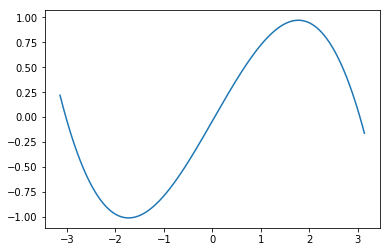

In [3]:
import math
import torch
from matplotlib import pyplot as plt

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# plt.plot(x, y)

a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

print(a, b, c, d)

ln = 1e-6

for i in range(2000):
    y_pred = a * x + b * x**2 + c * x**3 + d
    loss = (y_pred - y).pow(2).sum()

    

    loss.backward()

    if i % 100 == 99:
        print(loss)
        print(a,b,c,d)

    with torch.no_grad():
        a -= a.grad * ln
        b -= b.grad * ln
        c -= c.grad * ln
        d -= d.grad * ln

        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
        


plt.plot(x, a.item() * x + b.item() * x**2 + c.item() * x**3 + d.item())

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')